## <span style="color:blue">  Numerical exercises 9</span>
### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...
### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the ordered population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. (p = 1 è uniforme, p = 2 campiona di più numeri bassi, p = 1/2 campiona più numeri alti)

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>
Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!
Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span> (Ottimo perchè permette di verificare che il codice funzioni)
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

### Commenti sull'implementazione

L'architettura del programma è a classi per garantire modularità, riusabilità e chiarezza. È definita principalmente nei file `GA.h` (dichiarazioni) e `GA.cpp` (implementazioni).

* **`City`**: Una struttura dati che rappresenta una città tramite le sue coordinate cartesiane `(x, y)`. Include un metodo `Distance` per calcolare la distanza Euclidea (norma L2) tra la città corrente e un'altra.

* **`Individual`**: Questa classe rappresenta un singolo individuo della popolazione, ovvero un potenziale percorso. Le sue proprietà principali sono:
    * `path`: Un vettore di interi (`std::vector<int>`) che memorizza la sequenza ordinata degli indici delle città visitate. Come richiesto dalla consegna, la prima città (indice 0) è mantenuta fissa per ridurre lo spazio di ricerca e rimuovere le soluzioni simmetriche per rotazione.
    * `cost`: Una variabile `double` che quantifica la fitness dell'individuo. Il suo valore, calcolato tramite il metodo `Evaluate`, corrisponde alla lunghezza totale del percorso.

* **`Population`**: È la classe centrale che orchestra l'intera simulazione. Gestisce la collezione di individui, la mappa delle città e la logica evolutiva. Contiene i parametri chiave dell'algoritmo, tra cui la dimensione della popolazione, le probabilità di crossover (`p_crossover`) e mutazione (`p_mutations`).

#### Logica dell'algoritmo genetico

1.  **Inizializzazione**: La popolazione iniziale di 500 individui viene creata generando permutazioni casuali delle città (dalla seconda alla 34-esima), garantendo così percorsi validi e una diversità di partenza fondamentale per il successo dell'algoritmo. Una funzione di controllo, `IsValid`, verifica che ogni percorso sia una permutazione corretta degli indici delle città.

2.  **Funzione di costo (fitness)**: La "fitness" di un individuo è inversamente proporzionale al suo costo. Il costo è definito come la lunghezza totale del cammino (norma $L^{(1)}$ del percorso), calcolata come la somma delle distanze Euclidee tra città consecutive:
    $$ L^{(1)} = \sum_{i=0}^{N-1} d(\vec{c}_{path[i]}, \vec{c}_{path[i+1]}) $$
    dove $d$ è la distanza Euclidea e $path[N] = path[0]$ per chiudere il ciclo. L'obiettivo è minimizzare questo valore.

3.  **Selezione**: Per la creazione della nuova generazione, i genitori vengono scelti dalla popolazione corrente attraverso un meccanismo di selezione basato sul rango. La popolazione viene prima ordinata per costo crescente. Successivamente, un individuo `j` viene selezionato tramite la formula $j = \text{int}(M \cdot r^p)$, dove `M` è la dimensione della popolazione, `r` è un numero casuale uniforme in `[0,1)`, e `p` (`selection_exp`) è un esponente che modula la pressione selettiva.

4.  **Crossover**: L'operatore di crossover è il motore primario dell'evoluzione. Viene applicato con un'alta probabilità (`p_crossover = 0.8`) e combina due individui genitori per generare due figli. La tecnica implementata prevede un singolo punto di taglio: la prima parte del genoma di ogni genitore viene copiata nel rispettivo figlio, mentre la parte restante viene riempita con le città mancanti, prese nell'ordine in cui compaiono nel genoma dell'altro genitore. Questo approccio è efficace nel garantire sempre la creazione di percorsi ammissibili.

5.  **Mutazione**: Ai figli vengono applicate, con basse probabilità, delle mutazioni per introdurre nuova diversità genetica e prevenire la stagnazione in minimi locali. Sono stati implementati quattro diversi operatori, ognuno con uno scopo specifico:
    * **Permutazione di coppia**: Scambia due città casuali, introducendo una piccola variazione.
    * **Scorrimento (shift)**: Sposta un blocco contiguo di città, alterando significativamente la struttura del percorso.
    * **Permutazione di blocchi**: Scambia la posizione di due blocchi contigui di città.
    * **Inversione**: Inverte l'ordine di un sotto-percorso.

6.  **Creazione della nuova generazione**: Il modello è puramente generazionale: la nuova popolazione è interamente composta dai figli generati tramite crossover e mutazione. La forte pressione selettiva rende molto probabile che le caratteristiche delle soluzioni migliori vengano propagate e ricombinate nella generazione successiva.

#### Parametri e scelte implementative
* **Numero di individui (`N_individuals = 500`)**: Un valore che offre un buon compromesso tra diversità genetica ed efficienza computazionale.
* **Numero di generazioni (`N_gen = 1000`)**: Un numero di iterazioni sufficiente per permettere all'algoritmo di convergere verso una soluzione stabile.
* **Probabilità di crossover (`p_crossover = 0.8`)**: Indica che il crossover è l'operatore principale per l'esplorazione dello spazio delle soluzioni.
* **Probabilità di mutazione (`p_mutations`)**: Valori bassi (tra 0.05 e 0.1) confermano il ruolo della mutazione come operatore secondario, finalizzato all'introduzione di variabilità occasionale.
* **Esponente di selezione (`selection_exp = 2.0`)**: Un valore di `p=2` impone una forte pressione selettiva, favorendo la riproduzione degli individui più "in forma" pur mantenendo una probabilità non nulla di selezionare anche individui meno performanti, che potrebbero contenere materiale genetico utile.

#### Esecuzione e output
Il `main.cpp` fa partire l'intera simulazione per **34 città**, eseguendola per **1000 generazioni**. Vengono prodotte due serie di output:
1.  **Evoluzione del costo**: Per ogni generazione, vengono scritti su un file `.dat` il costo (lunghezza) del percorso migliore e il costo medio della metà migliore della popolazione.
2.  **Percorso migliore**: Al termine dell'evoluzione, le coordinate del percorso associato all'individuo con il costo minore vengono salvate su un secondo file `.dat`, permettendo la visualizzazione grafica del tragitto finale.

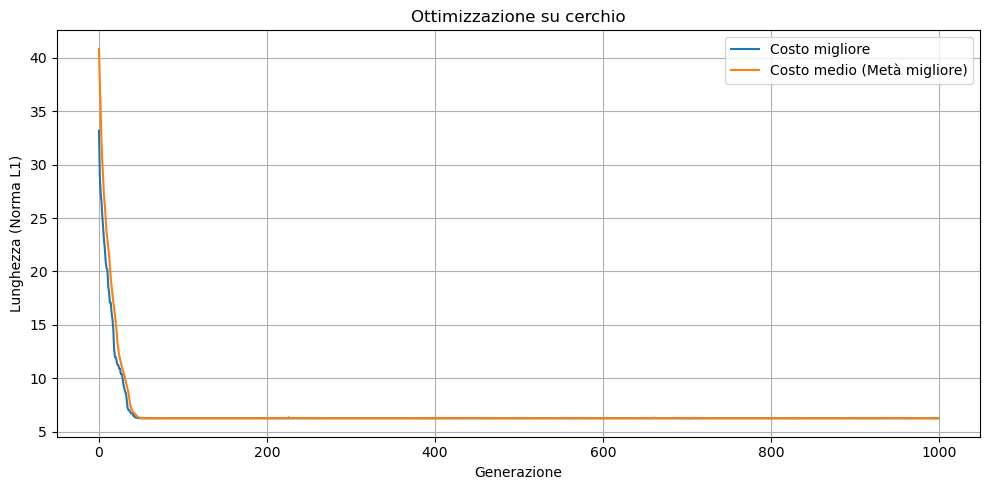

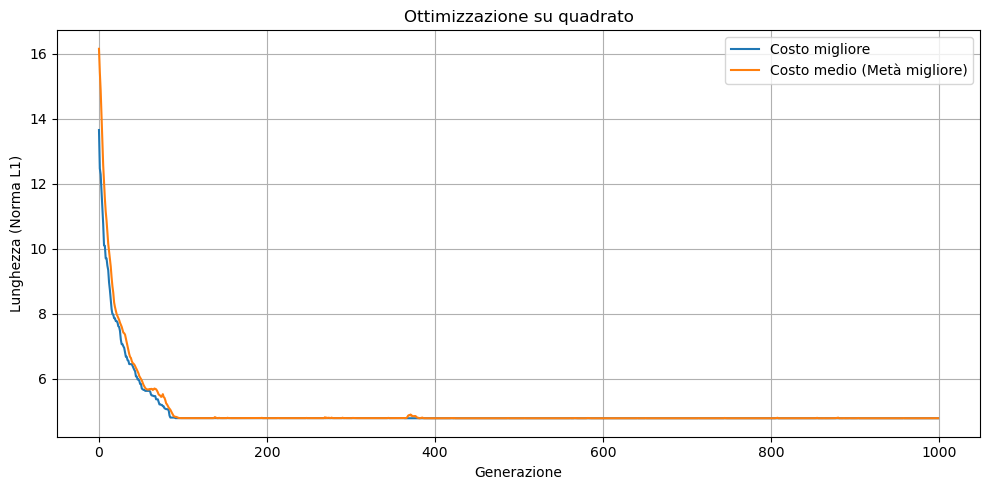

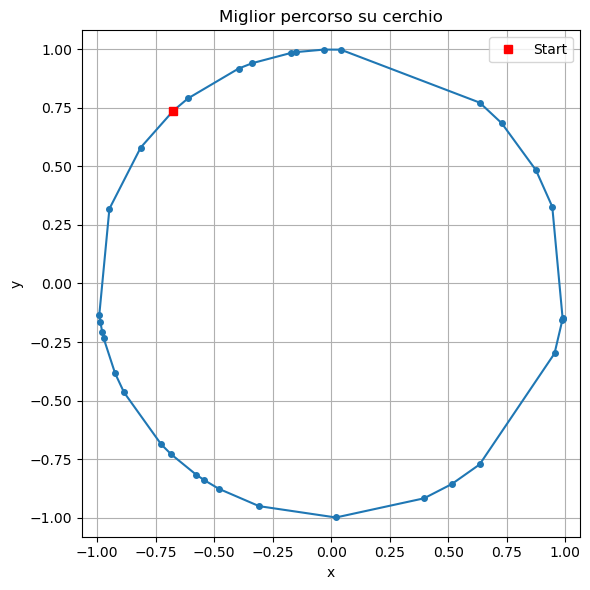

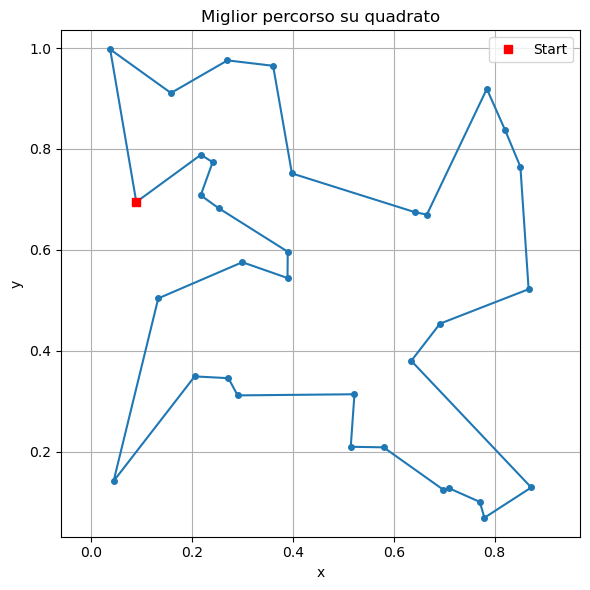

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Load and plot cost evolution ---

def plot_cost(filename, title):
    data = np.loadtxt(filename)
    best = data[:, 0]
    avg_half = data[:, 1]

    plt.figure(figsize=(10,5))
    plt.plot(best, label='Costo migliore')
    plt.plot(avg_half, label='Costo medio (Metà migliore)')
    plt.xlabel('Generazione')
    plt.ylabel('Lunghezza (Norma L1)')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_cost("cost_evolution_circle.dat", "Ottimizzazione su cerchio")
plot_cost("cost_evolution_square.dat", "Ottimizzazione su quadrato")

# --- Load and plot best path ---

def plot_path(filename, title):
    path = np.loadtxt(filename)
    x, y = path[:, 0], path[:, 1]
    plt.figure(figsize=(6,6))
    plt.plot(x, y, 'o-', markersize=4)
    plt.plot(x[0], y[0], 'rs', label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_path("best_path_circle.dat", "Miglior percorso su cerchio")
plot_path("best_path_square.dat", "Miglior percorso su quadrato")

### Analisi dei risultati

I grafici presentati mostrano i risultati ottenuti dall'algoritmo genetico (GA) applicato al problema del commesso viaggiatore (TSP) per due diverse configurazioni di 34 città: disposte su una circonferenza e all'interno di un quadrato.

####  Analisi del costo
I primi due grafici illustrano l'evoluzione della funzione di costo (lunghezza del percorso, norma L1) nel corso di 1000 generazioni.

* **Ottimizzazione su cerchio**: Si osserva una convergenza estremamente rapida. La lunghezza del percorso migliore ("Costo migliore") subisce una drastica riduzione entro le prime 100 generazioni, per poi stabilizzarsi su un valore minimo costante. Anche il costo medio della metà migliore della popolazione segue un andamento simile, avvicinandosi rapidamente al costo della soluzione ottima. Questo comportamento indica un'elevata efficienza dell'algoritmo su questa configurazione, con la popolazione che converge velocemente verso soluzioni di alta qualità.

* **Ottimizzazione su quadrato**: Anche in questo caso, la convergenza è molto rapida, sebbene leggermente meno immediata rispetto al caso circolare. La maggior parte del miglioramento avviene entro le prime 200 generazioni, dopodiché il costo del percorso migliore si assesta su un plateau. La distanza tra la curva del costo migliore e quella del costo medio rimane leggermente più marcata, suggerendo una maggiore diversità nella popolazione, coerente con la maggiore complessità del problema.

In entrambi i casi, la rapida discesa iniziale è sintomo di un'efficace esplorazione dello spazio delle soluzioni e di una forte pressione selettiva, che permette all'algoritmo di scartare rapidamente le configurazioni sub-ottimali.

#### Percorsi migliori
I due grafici finali mostrano la configurazione geometrica dei migliori percorsi trovati al termine delle 1000 generazioni.

* **Miglior percorso su cerchio**: Il percorso identificato dall'algoritmo è un itinerario non intersecato che segue la circonferenza, visitando le città in ordine sequenziale. Questo risultato coincide con la soluzione ottimale teorica per questa specifica configurazione. La capacità dell'algoritmo di trovare la soluzione esatta per questo caso funge da eccellente benchmark e validazione della sua correttezza ed efficacia.

* **Miglior percorso su quadrato**: Per la configurazione di città distribuite casualmente, dove la soluzione ottimale non è nota a priori, l'algoritmo ha prodotto un percorso di alta qualità. Il tracciato è chiuso e, soprattutto, privo di incroci. Questo dimostra la capacità dell'algoritmo genetico di risolvere efficacemente anche istanze non banali del problema.

In conclusione, i risultati confermano le ottime performance dell'algoritmo genetico implementato, capace di convergere rapidamente a soluzioni di alta qualità per entrambe le configurazioni di test.